![](../images/team.jpg)

![](../images/talk_agenda-01.png)

# What is sktime?
### *(and how is it related to sklearn?)*

- `sktime` is a python library for time-series learning tasks! 
- If you are interested in a more in-depth introduction to sktime - check out a previous [pydata tutorial](https://www.youtube.com/watch?v=ODspi8-uWgo) of ours, and of course visit [our website](https://www.sktime.org/en/latest/index.html)! 
- We *love* new contributors. Even if you are new to open source software developement!  Check out our [website](https://www.sktime.org/en/latest/get_involved/contributing.html) with some tips on how to get started.
- `sktime` is a `scikit-learn` (`sklearn`)-like library - a popular data science library! Why we like `sklearn`:
  - unified interface 
  - modular design
  - parts are composable
  - simple specification language

To scikit learn-like estimators you need to do 3 things:
- **Instantiate** your model of choice
- **Fit** the instance of your model
- Use that fitted instance to **predict** new data!

![](../images/sklearn_advantages-01.png)
  
### Example of sklearn interface:

- Here we use the sklearn interface to fit a regression model for diabetes disease progression based on factors of age, blood serum measurements, sex etc:  

In [2]:
from sklearn.datasets import load_diabetes   # our diabetes dataset
from sklearn.model_selection import train_test_split   # will allow us to helpfully subdivide our data
from sklearn.linear_model import LinearRegression  # a simple model we can play around with

# load, then split our data - by loading X and y we get a frame of all our patient attributes (age, sex serum etc) and a seperate frame of outcomes
attributes, progression = load_diabetes(return_X_y=True, as_frame=True)
attributes_train, attributes_test, progression_train, progression_test = train_test_split(attributes, progression, test_size=0.33)

# Instantiate
linear_regression = LinearRegression()

# Fit
linear_regression.fit(attributes_train, progression_train)

# Predict
progression_predict = linear_regression.predict(attributes_test)

### `sktime` is devoted to time-series data analysis:

- **Forecasting** - e.g. Can I predict (and provide uncertainty intervals for) the cost of electricity?
- **Classification** - e.g. - Lets classify healthy and diseased electro-cardiograms!
- **Annotation** - e.g. - For my Fitbit monitor data, can I find the segments where the user was running, sleeping, doing yoga?

### Using `sktime` to do forecasting:

Today's examples will center on examples of **Forecasting** tasks
- Forecasting is different than regression (even though it looks similar) because we are using past observations to predict future observations.
- In regression one instead uses relationship to other variables to predict new values for the target.

NaiveForecaster()

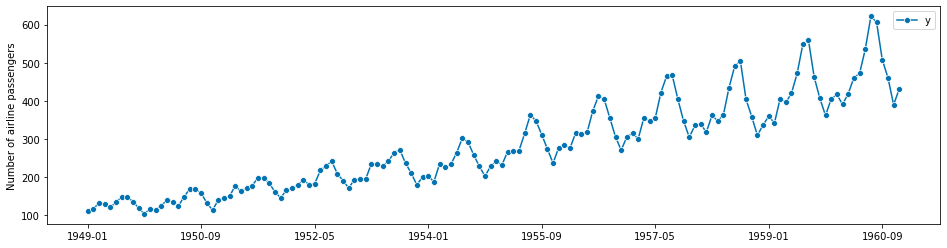

In [3]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

# Get our airline data:
y = load_airline()
plot_series(y, labels= ["y"])

# Instantiate:
forecaster = NaiveForecaster()

# Fit:
forecaster.fit(y)

### Forecasting horizons:

- Before we can move on to our last step - **predict** - we need to generate some time indices to predict with!
- We do this in `sktime` with `ForecastingHorizon`s

In [4]:
from sktime.forecasting.base import ForecastingHorizon
import pandas as pd
import numpy as np

# An sktime ForecastingHorizon object:
sktime_fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)

# numpy arrays are also valid:
simple_fh = np.arange(1, 37)

print(f'The sktime Forecasting Horizon:\n\n {sktime_fh}'
        ' \n\n The simple numpy based Forecasting Horizon:'
        ' \n\n {simple_fh} \n\n Both work!!')


The sktime Forecasting Horizon:

 ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False) 

 The simple numpy based Forecasting Horizon: 

 {simple_fh} 

 Both work!!


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

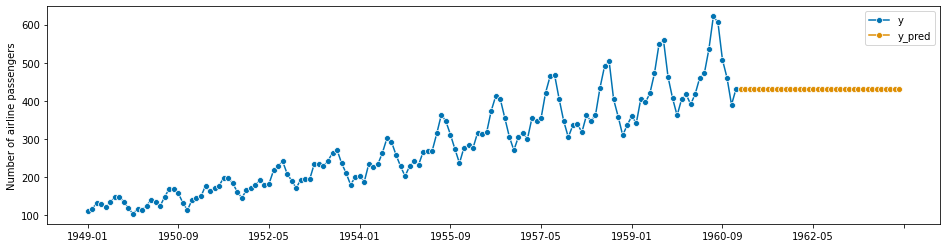

In [5]:
# Predict:
y_pred = forecaster.predict(sktime_fh)

# Check it out:
plot_series(y, y_pred, labels=["y", "y_pred"])

### `sktime` forecasters have tunable parameters that can improve forecasts:

Well - that doesn't look so great! 
- the `NaiveForecaster` is just guessing the last value it saw over an over again.
- one small improvement - we could at least pay attention to seasonal variation. 
- when you instantiate a model you can optionally pass parameters for that instance of the model:
- tuning these parameters often help your model perform better.
- lets check it out:

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

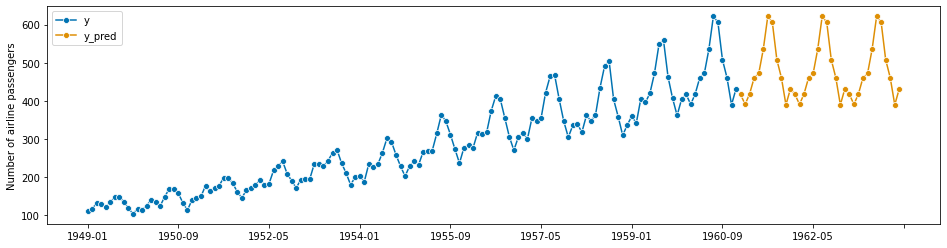

In [6]:
# Instantiate:
forecaster = NaiveForecaster(sp = 12)

# Fit:
forecaster.fit(y)

# Predict:
y_pred = forecaster.predict(sktime_fh)

# Check it out:
plot_series(y, y_pred, labels=["y", "y_pred"])

### It is easy to swap in a different Forecaster:

Slightly better!
- of course sktime has a large suite of forecasters - which for the most part perform better than the `NaiveForecaster`
- check out our [extended notebook](https://www.sktime.org/en/latest/examples/01_forecasting.html) just on forecasting to go deeper! (and [the appendix](https://www.sktime.org/en/latest/examples/01a_forecasting_sklearn.html))
- because of `sktime` design it is simple to swap in a different forecaster, we can also easily try that out:

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

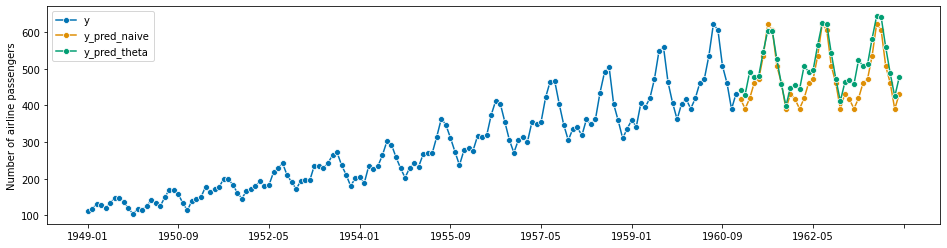

In [9]:
from sktime.forecasting.theta import ThetaForecaster

# Instantiate:
forecaster = ThetaForecaster(sp=12)

# Fit:
forecaster.fit(y)

# Predict:
y_pred_theta = forecaster.predict(sktime_fh)

# Check it out:
plot_series(y, y_pred, y_pred_theta, labels=["y", "y_pred_naive", "y_pred_theta"])

### Forecasting wrapup:

Some important topics related to forecasting that we did not cover today:
- `sktime` can facilitate the creation of uncertainty intervals for predictions - very important!
- we also support multivariate and hierarchical forecasts.
- reminder - all this info and mroe can be found in our [dedicated forecasting notebook](https://www.sktime.org/en/latest/examples/01_forecasting.html)! 


### Summary:

- `sktime` combines a library of dedicated time-series models with the tools that makes it easy to quickly and easily deploy them. 
- Our design makes it easy for you to try out different model parameters, and/or different models all together. 
- We can make these forecasts even better by transforming our data!

### What is next:

- Introduction to transformers - ie how we can make our forecasts better!
